In [1]:
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import requests
import numpy as np
import pandas as pd
import json

In [20]:
import glob
import csv

#combine all csv files into one

delimiter = ','
csvs = glob.glob('/home/codonnell/tutors/tutmain/*.csv')
combined_csv = pd.concat([pd.read_csv(f) for f in csvs])
combined_csv.to_csv('/home/codonnell/tutors/tutmain/all_tutors.csv')

In [21]:
sample=pd.read_csv('/home/codonnell/tutors/tutmain/all_tutors.csv')
sample.head()

,Unnamed: 0,Unnamed: 0.1,@context,@type,@id,paymentAccepted,currenciesAccepted,description,priceRange,image,...,bio,background_check,sunday,monday,tuesday,wednesday,thursday,friday,saturday,tot_tuts
0,0,0,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/TN/Murfreesboro/...,"Credit card, Paypal",USD,Elementary K-5 Reading Tutor,25.0,https://www.wyzant.com/images/tutor/silhouette...,...,['I am a fun loving mom who has a passion for ...,0.0,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",NaN
1,1,1,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/NJ/Montclair/728...,"Credit card, Paypal",USD,Experienced Tutor and Certified College Adviser,75.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,['I have been teaching at the secondary and un...,1.0,"[True, True, False, False, False, False, False...","[True, True, False, False, False, False, False...","[True, True, False, False, False, False, False...","[True, True, False, False, False, False, False...","[True, True, False, False, False, False, False...","[True, True, False, False, False, False, False...","[True, True, False, False, False, False, False...",NaN
2,2,2,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/TN/Murfreesboro/...,"Credit card, Paypal",USD,Experienced educator,20.0,https://www.wyzant.com/images/tutor/silhouette...,...,"['With experience as a writer and an editor, I...",1.0,"[True, True, False, False, False, False, False...","[True, True, False, False, False, False, False...","[True, True, False, False, False, False, False...","[True, True, False, False, False, False, False...","[True, True, False, False, False, False, False...","[True, True, False, False, False, False, False...","[True, True, False, False, False, False, False...",NaN
3,3,3,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/TN/La_Vergne/754...,"Credit card, Paypal",USD,Experienced in Math Tutoring,60.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,['I have been tutoring for several years. My s...,0.0,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",NaN
4,4,4,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/TX/Roanoke/7571813/,"Credit card, Paypal",USD,"Physics, Chemistry, and Math Tutor",64.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,['I have had a career in astronomy which inclu...,1.0,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[True, True, True, True, False, False, False, ...","[True, True, True, True, False, False, False, ...","[True, True, True, True, False, False, False, ...","[True, True, True, True, False, False, False, ...","[False, False, False, False, False, False, Fal...",NaN


In [22]:
len(sample)

1761

In [23]:
sample['priceRange'] = sample['priceRange'].apply(float)

In [16]:
def remove_hours(hours):
    if hours == 'Bio':
        return 0
    else:
        return float(hours.split(' ')[0].replace(',',''))

In [24]:
sample['time_tutoring'] = sample['time_tutoring'].apply(remove_hours)

In [25]:
sample['priceRange'].describe()

count    1761.000000
mean       62.378762
std        62.953421
min        10.000000
25%        30.000000
50%        45.000000
75%        65.000000
max       500.000000
Name: priceRange, dtype: float64

In [55]:
sample_active = sample[sample['time_tutoring']>10]

In [51]:
len(sample_active)

87

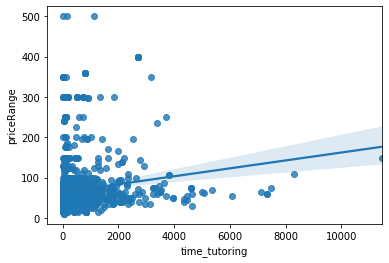

In [56]:
import seaborn as sb
sb.regplot(sample_active['time_tutoring'],sample_active['priceRange'])

In [39]:
int(json.loads(sample['aggregateRating'].iloc[0].replace("'",'"'))['ratingCount'])

0

In [44]:
def get_rating_count(agg):
    return int(json.loads(agg.replace("'",'"'))['ratingCount'])

In [61]:
def get_rating_value(agg):
    val = json.loads(agg.replace("'",'"'))['ratingValue']
    if val:
        return float(val)
    else:
        return 0

In [70]:
def get_review_count(agg):
    val = json.loads(agg.replace("'",'"'))['reviewCount']
    if val:
        return float(val)
    else:
        return 0

In [97]:
sample_active['rating_count'] = sample_active['aggregateRating'].apply(get_rating_count)
sample_active['rating_av_value'] = sample_active['aggregateRating'].apply(get_rating_value)
sample_active['review_count'] = sample_active['aggregateRating'].apply(get_review_count)
sample_active['bio_length'] = sample_active['bio'].apply(get_bio_length)
sample_active['num_subjects'] = sample_active['makesOffer'].apply(get_num_subjects)

<ipython-input-97-1867561ec60a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_active['rating_count'] = sample_active['aggregateRating'].apply(get_rating_count)
<ipython-input-97-1867561ec60a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_active['rating_av_value'] = sample_active['aggregateRating'].apply(get_rating_value)
<ipython-input-97-1867561ec60a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

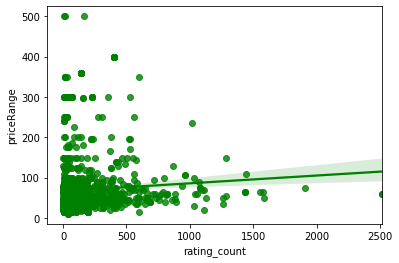

In [78]:
sb.regplot(sample_active['rating_count'],sample_active['priceRange'],color='green')

In [72]:
sample_active_nzero = sample_active[sample_active['rating_av_value']>0]
sample_active_nrevzero = sample_active[sample_active['review_count']>0]

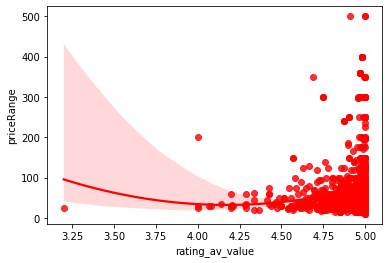

In [76]:
sb.regplot(sample_active_nzero['rating_av_value'],sample_active_nzero['priceRange'],order=2, color = 'red')

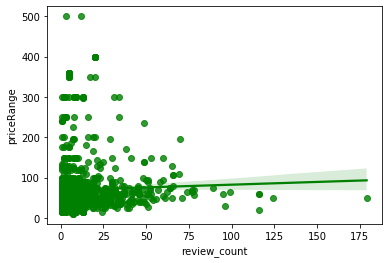

In [77]:
sb.regplot(sample_active_nrevzero['review_count'],sample_active_nrevzero['priceRange'],color ='green')

In [83]:
def get_bio_length(bio):
    return len(bio.split(' '))

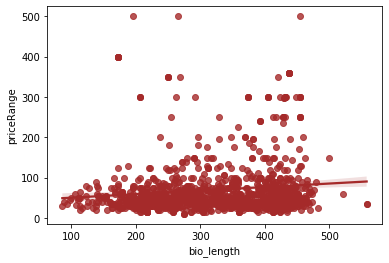

In [85]:
sb.regplot(sample_active['bio_length'],sample_active['priceRange'],color ='brown')

In [96]:
def get_num_subjects(sub_list):
    return len(json.loads(sub_list.replace("'",'"')))

In [99]:
sample_active=sample_active[sample_active['num_subjects']<200]

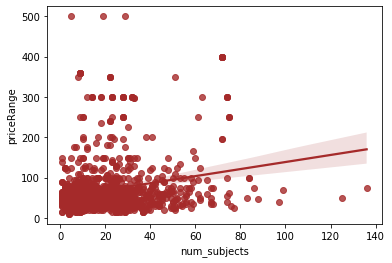

In [100]:
sb.regplot(sample_active['num_subjects'],sample_active['priceRange'],color ='brown')

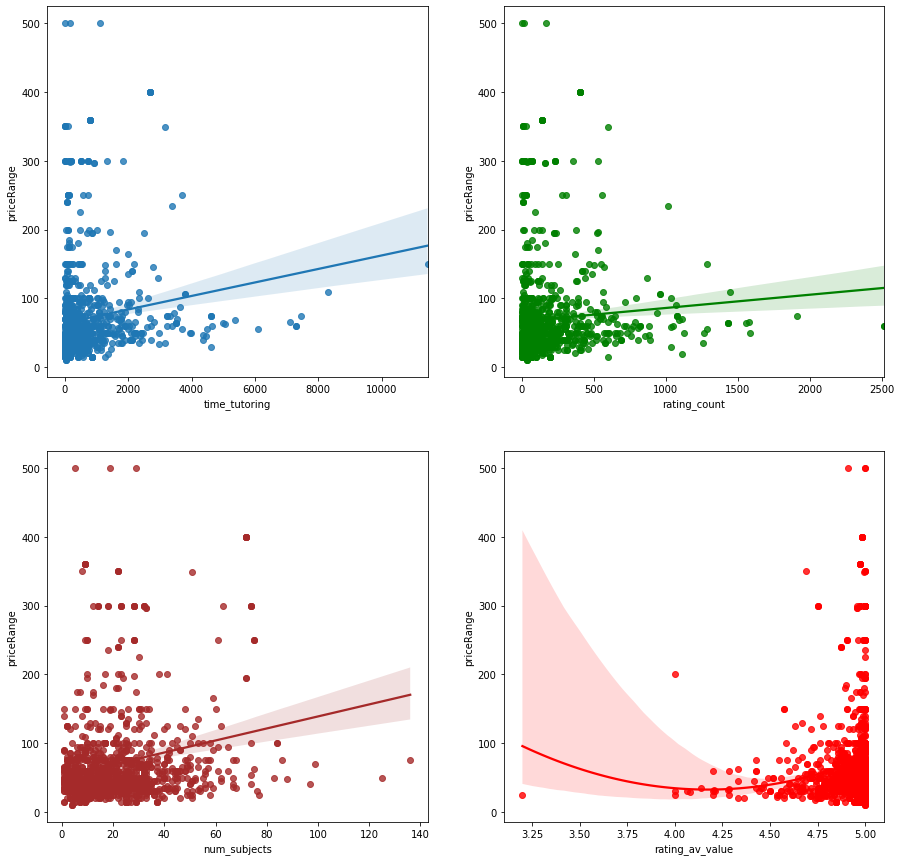

In [107]:
from matplotlib import pyplot as plt
from matplotlib import rcParams

f, axes = plt.subplots(2, 2)
rcParams['figure.figsize'] = 15,15
    
sb.regplot(sample_active['time_tutoring'],sample_active['priceRange'], ax=axes[0,0])
sb.regplot(sample_active['rating_count'],sample_active['priceRange'],color='green',ax=axes[0,1])
sb.regplot(sample_active_nzero['rating_av_value'],sample_active_nzero['priceRange'],order=2, color = 'red',ax=axes[1,1])
sb.regplot(sample_active['num_subjects'],sample_active['priceRange'],color ='brown',ax=axes[1,0])
plt.savefig('/home/codonnell/tutors/basic_eda.png')

<Figure size 1080x1080 with 0 Axes>